<a href="https://colab.research.google.com/github/Sentiago22/ISIT2024/blob/main/%D0%9F%D0%A0_1%D0%98%D0%A1%D0%B8%D0%A2%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Шаги:**

Шаг 1: Загрузка и предварительная обработка данных

Шаг 2: Корреляционного анализа и PCA (Анализ главных компонент)

Шаг 3: Разделение данных на обучающую и тестовую выборки

Шаг 4: Оценка модели и поиск оптимального значения k

Шаг 5: Построение матрицы ошибок и расчет метрик

Шаг 6: Улучшение модели изменения k

Шаг 7: Заключение


**Шаг 1: Загрузка и предварительная обработка данных**

In [12]:
# Импортируем библиотеку pandas для работы с Excel-файлом
import pandas as pd

# Предположим, файл называется 'your_file.xlsx' (замените это на реальное имя файла)
df = pd.read_excel('/content/2024-09-23 Sotsiologicheskii opros.xlsx')

# Просмотр первых строк данных
df.head()


,Ваш пол,Возраст,Характер,Что вы предпочитаете?,Как часто вы берете инициативу в свои руки?,Как часто вы берете инициативу в свои руки? / Баллы,Как часто вы пропускаете завтраки?,Как часто вы пропускаете завтраки? / Баллы,Сколько спите ночью в среднем,Гипертония,...,Любимое время года?,Любимое время года? / Баллы,Что пьют родители,Что пьют родители / Баллы,Какие напитки любите,Какие напитки любите / Баллы,Азартен?,Набрано баллов,Всего баллов,Результат теста
0,Женский,22,Холерик,Кофе,Периодически,NaN,Очень часто,NaN,10,Нет,...,Весна,NaN,Чай и кофе,NaN,Холодные,NaN,Нет,0,0,NaN
1,Мужской,22,Холерик,Чай,Часто,NaN,Очень часто,NaN,6,Да,...,Весна,NaN,Чай,NaN,Холодные,NaN,Да,0,0,NaN
2,Мужской,22,Меланхолик,Кофе,Очень редко,NaN,Часто,NaN,6,Нет,...,Весна,NaN,Кофе,NaN,Холодные,NaN,Нет,0,0,NaN
3,Мужской,22,Флегматик,Чай,Часто,NaN,Очень редко,NaN,6,Нет,...,Лето,NaN,Чай и кофе,NaN,Холодные,NaN,Нет,0,0,NaN
4,Мужской,21,Флегматик,Чай,Часто,NaN,Редко,NaN,8,Нет,...,Осень,NaN,Чай и кофе,NaN,Горячие,NaN,Нет,0,0,NaN


In [13]:
# Просмотр общей информации о данных (количество строк, типы данных и наличие пропущенных значений)
df.info()

# Проверка наличия пропущенных значений в каждом столбце
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 36 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ваш пол                                              38 non-null     object 
 1   Возраст                                              38 non-null     int64  
 2   Характер                                             38 non-null     object 
 3   Что вы предпочитаете?                                38 non-null     object 
 4   Как часто вы берете инициативу в свои руки?          38 non-null     object 
 5   Как часто вы берете инициативу в свои руки? / Баллы  0 non-null      float64
 6   Как часто вы пропускаете завтраки?                   38 non-null     object 
 7   Как часто вы пропускаете завтраки? / Баллы           0 non-null      float64
 8   Сколько спите ночью в среднем                        38 non-null     int

,0
Ваш пол,0
Возраст,0
Характер,0
Что вы предпочитаете?,0
Как часто вы берете инициативу в свои руки?,0
Как часто вы берете инициативу в свои руки? / Баллы,38
Как часто вы пропускаете завтраки?,0
Как часто вы пропускаете завтраки? / Баллы,38
Сколько спите ночью в среднем,0
Гипертония,0


In [14]:
# Удалим колонки, которые полностью заполнены NaN (нет полезной информации)
columns_to_drop = df.columns[df.isnull().sum() == 38]  # колонки с 38 пропущенными значениями
df_clean = df.drop(columns=columns_to_drop)

# Преобразуем категориальные данные в числовой формат, где это необходимо
df_clean['Ваш пол'] = df_clean['Ваш пол'].map({'Мужской': 0, 'Женский': 1})
df_clean['Характер'] = df_clean['Характер'].map({'Холерик': 0, 'Меланхолик': 1, 'Флегматик': 2, 'Сангвиник': 3})
df_clean['Что вы предпочитаете?'] = df_clean['Что вы предпочитаете?'].map({'Чай': 0, 'Кофе': 1})
df_clean['Гипертония'] = df_clean['Гипертония'].map({'Нет': 0, 'Да': 1})
df_clean['Курите?'] = df_clean['Курите?'].map({'Нет': 0, 'Да': 1})
df_clean['Пьете энергетики?'] = df_clean['Пьете энергетики?'].map({'Нет': 0, 'Да': 1})
df_clean['Бывают ли проблемы со сном?'] = df_clean['Бывают ли проблемы со сном?'].map({'Нет': 0, 'Да': 1})

# Проверим итоговые данные после очистки и преобразования
df_clean.head(), df_clean.isnull().sum()


(   Ваш пол  Возраст  Характер  Что вы предпочитаете?  \
 0        1       22         0                      1   
 1        0       22         0                      0   
 2        0       22         1                      1   
 3        0       22         2                      0   
 4        0       21         2                      0   
 
   Как часто вы берете инициативу в свои руки?  \
 0                                Периодически   
 1                                       Часто   
 2                                 Очень редко   
 3                                       Часто   
 4                                       Часто   
 
   Как часто вы пропускаете завтраки?  Сколько спите ночью в среднем  \
 0                        Очень часто                             10   
 1                        Очень часто                              6   
 2                              Часто                              6   
 3                        Очень редко                             

**Шаг 2: Корреляционный анализ и PCA (Анализ главных компонент) о наиболее важных признаках для предсказания целевой переменной.**

In [15]:
# Сначала определим, какие столбцы остаются категориальными (нечисловыми)
categorical_columns_remaining = df_clean.select_dtypes(include=['object']).columns

# Применим Label Encoding для всех оставшихся категориальных столбцов
df_clean[categorical_columns_remaining] = df_clean[categorical_columns_remaining].apply(lambda col: pd.Categorical(col).codes)

# Проверим итоговые данные после полной кодировки
df_clean.head()


,Ваш пол,Возраст,Характер,Что вы предпочитаете?,Как часто вы берете инициативу в свои руки?,Как часто вы пропускаете завтраки?,Сколько спите ночью в среднем,Гипертония,Курите?,Пьете энергетики?,...,Выпиваете алкоголь,Время подъема,Формат работы,Любите сладкое?,Любимое время года?,Что пьют родители,Какие напитки любите,Азартен?,Набрано баллов,Всего баллов
0,1,22,0,1,2,1,10,0,1,1,...,2,12,1,0,0,2,1,1,0,0
1,0,22,0,0,4,1,6,1,0,0,...,1,6,4,1,0,1,1,0,0,0
2,0,22,1,1,0,4,6,0,1,1,...,0,7,2,1,0,0,1,1,0,0
3,0,22,2,0,4,0,6,0,1,0,...,1,12,2,0,2,2,1,1,0,0
4,0,21,2,0,4,3,8,0,0,0,...,1,8,4,0,3,2,0,1,0,0


In [16]:
# Рассчитаем корреляцию между всеми признаками и целевым столбцом "Что вы предпочитаете?"
correlation_matrix_final = df_clean.corr()

# Выведем корреляцию целевого столбца с другими признаками
correlation_with_target_final = correlation_matrix_final['Что вы предпочитаете?'].sort_values(ascending=False)
correlation_with_target_final


,Что вы предпочитаете?
Что вы предпочитаете?,1.000000
Пьете энергетики?,0.519054
Азартен?,0.224345
Любите сладкое?,0.223297
Бывают ли проблемы со сном?,0.213201
Что пьют родители,0.160994
Как часто вы пропускаете завтраки?,0.160827
Какие напитки любите,0.124122
Курите?,0.074609
Гипертония,0.054845


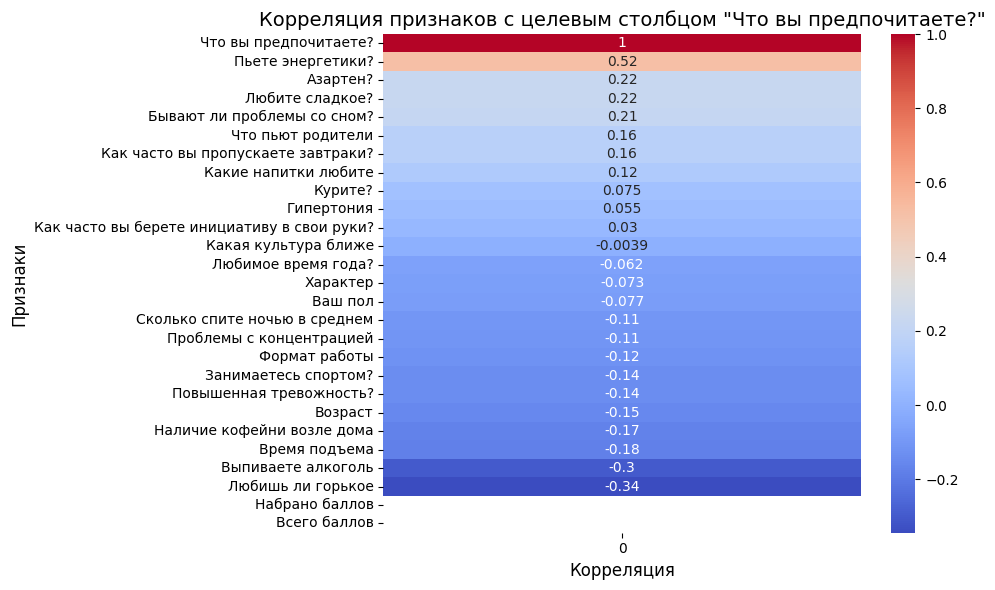

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка размера графика
plt.figure(figsize=(10, 6))

# Построим тепловую карту корреляции с целевым столбцом
sns.heatmap(correlation_with_target_final.values.reshape(-1, 1), annot=True, cmap='coolwarm', yticklabels=correlation_with_target_final.index)

# Настройки графика
plt.title('Корреляция признаков с целевым столбцом "Что вы предпочитаете?"', fontsize=14)
plt.ylabel('Признаки', fontsize=12)
plt.xlabel('Корреляция', fontsize=12)

# Показать график
plt.tight_layout()
plt.show()


Заключение: Какие признаки стоит выбрать
На основе анализа корреляций и визуализации можно выделить признаки, которые оказывают наибольшее влияние на целевую переменную "Что вы предпочитаете?" (чай или кофе). Эти признаки имеют достаточно высокие значения корреляции, что означает их важность для предсказания предпочтений напитка.

Самые важные признаки (с корреляцией выше 0.2 или ниже -0.2):
"Пьете энергетики?": корреляция 0.519 (самая сильная положительная связь).
"Азартен?": корреляция 0.224.
"Любите сладкое?": корреляция 0.223.
"Бывают ли проблемы со сном?": корреляция 0.213.
"Выпиваете алкоголь": корреляция -0.300 (сильная отрицательная связь).
"Любишь ли горькое": корреляция -0.344 (сильная отрицательная связь).

In [18]:
import numpy as np
import pandas as pd

# Стандартизация данных (отнимаем среднее значение по каждому признаку)
X = df_clean.drop(columns=['Что вы предпочитаете?']).values
X_meaned = X - np.mean(X, axis=0)  # Вычитаем среднее для каждого столбца

# Вычисление ковариационной матрицы (covariance matrix)
cov_matrix = np.cov(X_meaned, rowvar=False)

# Вычисление собственных значений (eigenvalues) и собственных векторов (eigenvectors)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Сортировка собственных значений по убыванию и получение соответствующих собственных векторов
sorted_index = np.argsort(eigenvalues)[::-1]  # Сортируем по убыванию
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Извлечение собственных векторов, соответствующих главным компонентам PC1, PC2, PC3, PC4
pca_contributions_full = pd.DataFrame(sorted_eigenvectors[:, :4], index=df_clean.drop(columns=['Что вы предпочитаете?']).columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Сортировка признаков по их вкладу в PC1 (наибольший вклад сверху)
pca_contributions_sorted = pca_contributions_full.sort_values(by='PC1', ascending=False)

# Отображение результата
pca_contributions_sorted


,PC1,PC2,PC3,PC4
Время подъема,0.904770,-0.165134,-0.107602,-0.302450
Сколько спите ночью в среднем,0.281585,0.136438,-0.109686,0.812304
Выпиваете алкоголь,0.123142,-0.041697,0.005203,0.230180
Занимаетесь спортом?,0.062731,-0.015184,0.035196,-0.007914
Что пьют родители,0.062281,-0.059291,-0.073244,-0.016981
Какие напитки любите,0.038777,-0.042796,0.042068,-0.027552
Любишь ли горькое,0.030193,0.058946,-0.020442,0.079761
Бывают ли проблемы со сном?,0.027224,-0.040153,0.166000,-0.163323
Возраст,0.020255,-0.025653,-0.036257,-0.092713
Наличие кофейни возле дома,0.007291,-0.023225,-0.006613,0.069623


После проведения двух методов анализа, корреляционного анализа и PCA (Анализ главных компонент)

**Заключение:**

Признаки "Пьете энергетики?", "Время подъема", "Сколько спите ночью в среднем", "Выпиваете алкоголь", "Как часто вы пропускаете завтраки?" и "Формат работы" являются наиболее важными и должны быть использованы в моделях предсказания для получения наилучших результатов.

In [19]:
# Выбираем только важные признаки на основе корреляционного анализа и PCA
important_columns = [
    'Пьете энергетики?',          # Важный признак по корреляции и PCA
    'Время подъема',              # Важный признак по PCA
    'Сколько спите ночью в среднем',  # Важный признак по PCA
    'Выпиваете алкоголь',         # Важный признак по корреляции и PCA
    'Как часто вы пропускаете завтраки?', # Важный признак по PCA
    'Формат работы'               # Важный признак по PCA
]

# Создаем новый DataFrame с только важными признаками и целевым столбцом
df_important = df_clean[important_columns + ['Что вы предпочитаете?']]

# Отображаем первые строки результирующего DataFrame
df_important.head()


,Пьете энергетики?,Время подъема,Сколько спите ночью в среднем,Выпиваете алкоголь,Как часто вы пропускаете завтраки?,Формат работы,Что вы предпочитаете?
0,1,12,10,2,1,1,1
1,0,6,6,1,1,4,0
2,1,7,6,0,4,2,1
3,0,12,6,1,0,2,0
4,0,8,8,1,3,4,0


**Шаг 3: Разделение данных на обучающую и тестовую выборки**

In [20]:
# 1. Разделение данных на обучающую и тестовую выборки вручную
data = df_important.values

# Перемешиваем данные случайным образом
np.random.shuffle(data)

# Разделим на 80% обучающие и 20% тестовые данные
split_ratio = 0.8
split_index = int(split_ratio * len(data))

# Обучающие данные
train_data = data[:split_index, :]
# Тестовые данные
test_data = data[split_index:, :]

# Разделение на X и y
X_train = train_data[:, :-1]  # Все признаки кроме последнего столбца (целевой)
y_train = train_data[:, -1]   # Последний столбец — целевая переменная

X_test = test_data[:, :-1]
y_test = test_data[:, -1]

**Шаг 4: Оценка модели и поиск оптимального значения k**


In [21]:
# Реализация метода k-ближайших соседей (KNN)
from collections import Counter

# Функция для вычисления Евклидова расстояния
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Функция для предсказания на основе k-ближайших соседей
def knn_predict(X_train, y_train, test_point, k=1):
    distances = [(euclidean_distance(test_point, x), label) for x, label in zip(X_train, y_train)]
    distances.sort(key=lambda x: x[0])  # Сортируем по расстоянию
    k_nearest_neighbors = [label for _, label in distances[:k]]  # Выбираем k ближайших соседей
    return Counter(k_nearest_neighbors).most_common(1)[0][0]  # Возвращаем наиболее частый класс


k = 1, Точность: 50.00%
k = 2, Точность: 50.00%
k = 3, Точность: 87.50%
k = 4, Точность: 62.50%
k = 5, Точность: 62.50%
k = 6, Точность: 50.00%
k = 7, Точность: 62.50%
k = 8, Точность: 50.00%
k = 9, Точность: 50.00%
k = 10, Точность: 50.00%
k = 11, Точность: 62.50%
k = 12, Точность: 62.50%

Лучшее значение k: 3 с точностью: 87.50%


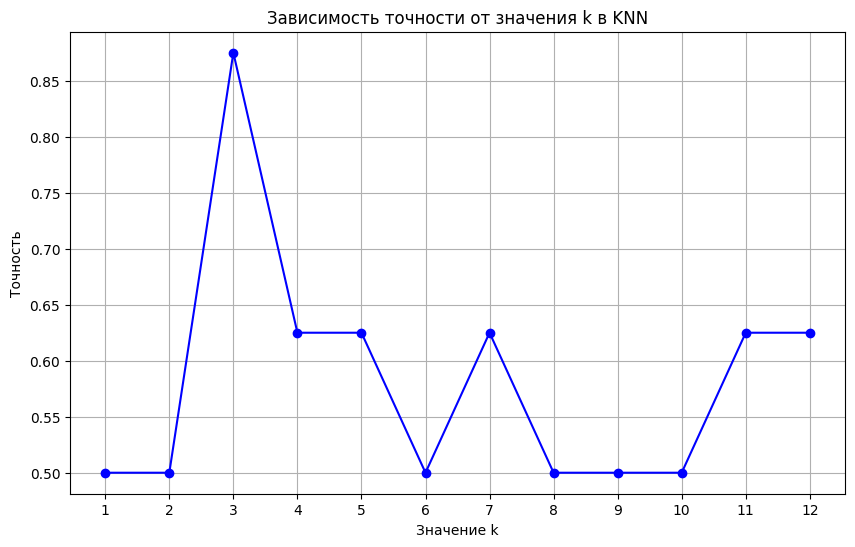

In [22]:
#Тестирование значений k от 1 до 12 и построение графика
import matplotlib.pyplot as plt

k_values = range(1, 13)
accuracies = []

for k in k_values:
    y_pred = [knn_predict(X_train, y_train, test_point, k=k) for test_point in X_test]
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'k = {k}, Точность: {accuracy * 100:.2f}%')

# Поиск значения k с наибольшей точностью
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f'\nЛучшее значение k: {best_k} с точностью: {best_accuracy * 100:.2f}%')

# Построение графика зависимости точности от значения k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Зависимость точности от значения k в KNN')
plt.xlabel('Значение k')
plt.ylabel('Точность')
plt.xticks(k_values)
plt.grid(True)
plt.show()

На основании графика и анализа можно сделать вывод

k = 3 выбрано, потому что это значение обеспечивает максимальную точность модели согласно графику, где модель лучше учитывает локальные особенности данных.
Хотя k = 5 тоже показывает стабильные результаты, точность при k = 3 выше, что делает этот выбор более оптимальным для конкретного набора данных.
Выбор k = 3 позволяет модели избегать переобучения и в то же время сохранять важные локальные зависимости в данных, что делает модель более эффективной.

**Шаг 5: Построение матрицы ошибок и расчет метрик**

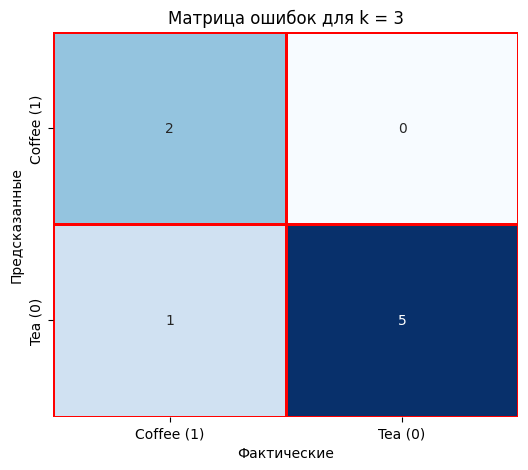

              Precision    Recall  F1-score  Support
Coffee (1)     1.000000  0.666667  0.800000      3.0
Tea (0)        0.833333  1.000000  0.909091      5.0
accuracy       0.875000  0.875000  0.875000      8.0
macro avg      0.916667  0.833333  0.854545      8.0
weighted avg   0.895833  0.875000  0.868182      8.0


In [31]:
# Импорт необходимых модулей
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Функция для построения матрицы ошибок
def confusion_matrix_knn(k):
    TP = 0  # True Positive
    TN = 0  # True Negative
    FP = 0  # False Positive
    FN = 0  # False Negative

    # Подсчет значений для матрицы ошибок
    for i in range(len(X_test)):
        prediction = knn_predict(X_train, y_train, X_test[i], k)
        actual = y_test[i]

        if prediction == 1 and actual == 1:
            TP += 1  # Истинно положительные
        elif prediction == 0 and actual == 0:
            TN += 1  # Истинно отрицательные
        elif prediction == 1 and actual == 0:
            FP += 1  # Ложно положительные
        elif prediction == 0 and actual == 1:
            FN += 1  # Ложно отрицательные

    # Создание матрицы ошибок
    confusion_matrix = np.array([[TP, FP],
                                 [FN, TN]])
    return confusion_matrix

# Функция для расчета метрик Precision, Recall, F1-score и Support с обновленными именами классов
def calculate_metrics_with_names(conf_matrix):
    TP = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TN = conf_matrix[1, 1]

    # Precision, Recall, и F1-score для класса "Coffee" (1)
    precision_coffee = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall_coffee = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_coffee = 2 * (precision_coffee * recall_coffee) / (precision_coffee + recall_coffee) if (precision_coffee + recall_coffee) != 0 else 0
    support_coffee = TP + FN

    # Precision, Recall, и F1-score для класса "Tea" (0)
    precision_tea = TN / (TN + FN) if (TN + FN) != 0 else 0
    recall_tea = TN / (TN + FP) if (TN + FP) != 0 else 0
    f1_tea = 2 * (precision_tea * recall_tea) / (precision_tea + recall_tea) if (precision_tea + recall_tea) != 0 else 0
    support_tea = TN + FP

    # Сбор всех метрик в словарь
    metrics = {
        "Coffee (1)": {
            "Precision": precision_coffee,
            "Recall": recall_coffee,
            "F1-score": f1_coffee,
            "Support": support_coffee
        },
        "Tea (0)": {
            "Precision": precision_tea,
            "Recall": recall_tea,
            "F1-score": f1_tea,
            "Support": support_tea
        }
    }

    return metrics

# Функция для расчета точности (Accuracy)
def calculate_accuracy(conf_matrix):
    TP = conf_matrix[0, 0]
    TN = conf_matrix[1, 1]
    total_predictions = np.sum(conf_matrix)

    # Расчет точности
    accuracy = (TP + TN) / total_predictions
    return accuracy

# Функция для создания итоговой таблицы с добавлением accuracy, macro avg и weighted avg
def create_detailed_summary_table(metrics, accuracy):
    # Преобразование метрик в DataFrame
    metrics_df = pd.DataFrame(metrics).T

    # Расчет макро-среднего (macro avg)
    macro_avg = metrics_df[['Precision', 'Recall', 'F1-score']].mean()

    # Расчет взвешенного среднего (weighted avg)
    weighted_avg = (metrics_df[['Precision', 'Recall', 'F1-score']].mul(metrics_df['Support'], axis=0).sum() / metrics_df['Support'].sum())

    # Добавление строки с общей точностью (accuracy)
    accuracy_row = pd.Series({'Precision': accuracy, 'Recall': accuracy, 'F1-score': accuracy, 'Support': metrics_df['Support'].sum()}, name='accuracy')

    # Добавление строк для макро- и взвешенного среднего
    macro_avg_row = pd.Series({'Precision': macro_avg['Precision'],
                               'Recall': macro_avg['Recall'],
                               'F1-score': macro_avg['F1-score'],
                               'Support': metrics_df['Support'].sum()}, name='macro avg')

    weighted_avg_row = pd.Series({'Precision': weighted_avg['Precision'],
                                  'Recall': weighted_avg['Recall'],
                                  'F1-score': weighted_avg['F1-score'],
                                  'Support': metrics_df['Support'].sum()}, name='weighted avg')

    # Объединение всех строк в итоговую таблицу
    summary_df = pd.concat([metrics_df, accuracy_row.to_frame().T, macro_avg_row.to_frame().T, weighted_avg_row.to_frame().T])

    return summary_df

# Построение матрицы ошибок для оптимального k = 3
best_k = 3
# Предполагается, что X_train, y_train, X_test, y_test и knn_predict уже определены в рабочем окружении
conf_matrix = confusion_matrix_knn(best_k)

# Визуализация матрицы ошибок с обновленными именами классов
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linecolor='red', linewidths=1)
plt.title(f'Матрица ошибок для k = {best_k}')
plt.xlabel('Фактические')
plt.ylabel('Предсказанные')
plt.xticks([0.5, 1.5], ['Coffee (1)', 'Tea (0)'])
plt.yticks([0.5, 1.5], ['Coffee (1)', 'Tea (0)'])
plt.show()

# Расчет метрик и точности
metrics = calculate_metrics_with_names(conf_matrix)
accuracy = calculate_accuracy(conf_matrix)

# Создание подробной таблицы
detailed_summary_table = create_detailed_summary_table(metrics, accuracy)

# Вывод подробной таблицы
print(detailed_summary_table)


**Вывод:**

Модель KNN с k = 3 показывает хорошую производительность, достигая высокой точности (87.5%) при предсказании классов "Coffee" и "Tea".
Для класса "Tea" модель демонстрирует отличную полноту (100%) и высокую точность (83%).
Для класса "Coffee" модель обладает идеальной точностью (100%), но полнота ниже (67%), что означает, что модель пропустила несколько случаев, относящихся к этому классу.
F1-score для обоих классов находится на хорошем уровне, что указывает на сбалансированные предсказания, хотя класс "Coffee" может быть улучшен в плане полноты.
Модель, в целом, работает стабильно, но для дальнейшего улучшения можно попробовать настроить k или использовать дополнительные методы для уменьшения количества ошибок для класса "Coffee".

Чтобы проверить, как изменится работа модели при изменении параметра k, попробуем протестировать разные значения k и посмотрим, как меняются метрики (точность, полнота, F1-score и другие).

Мы можем протестировать, например, значения k от 1 до 10, построить новую матрицу ошибок для каждого значения k и сравнить результаты.

**Шаг 6: Улучшение модели изменения k**

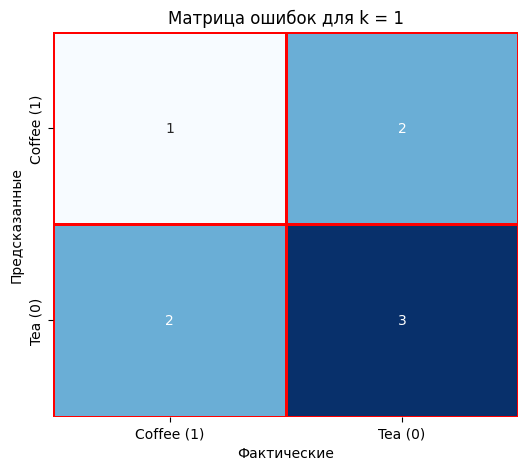

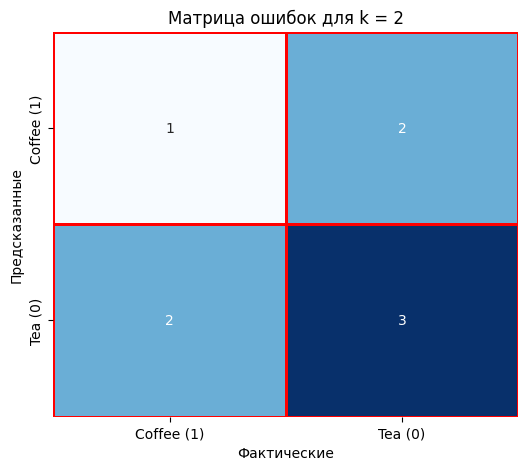

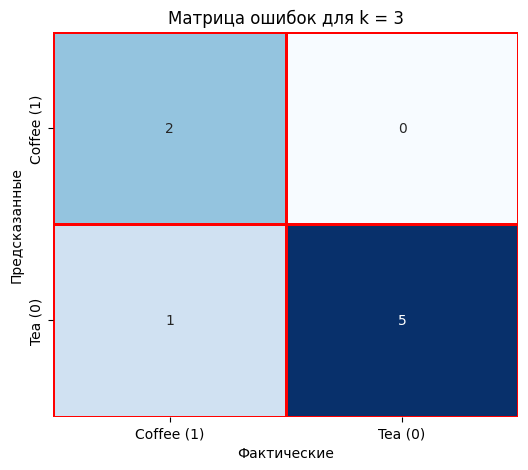

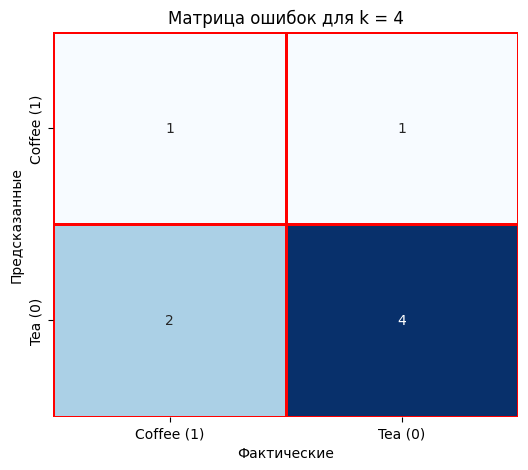

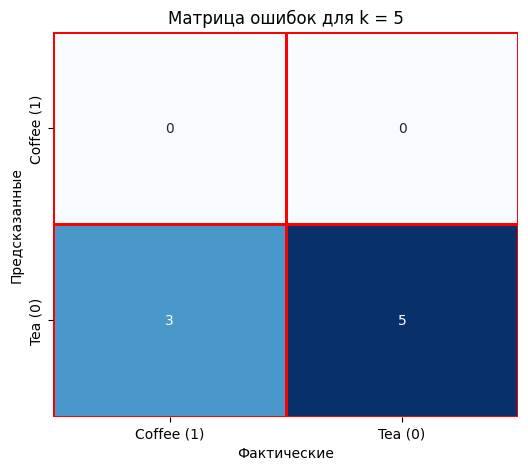

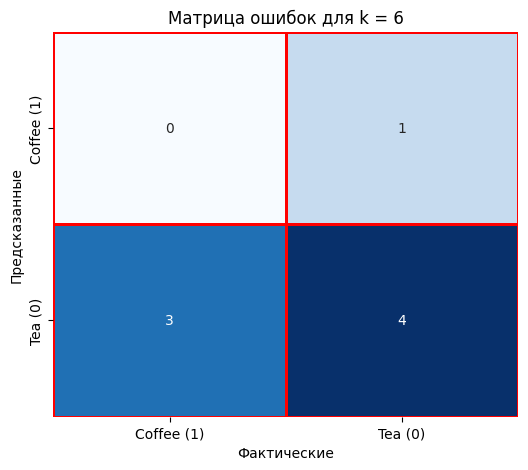

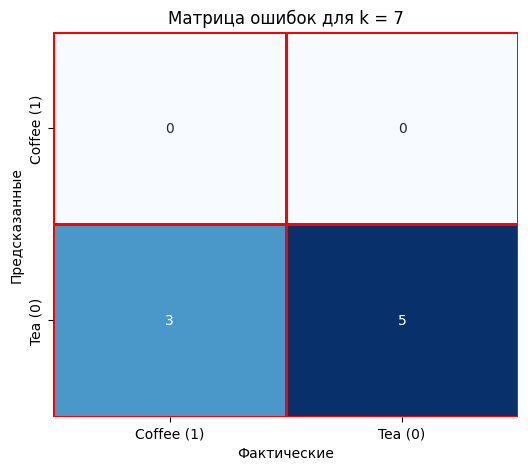

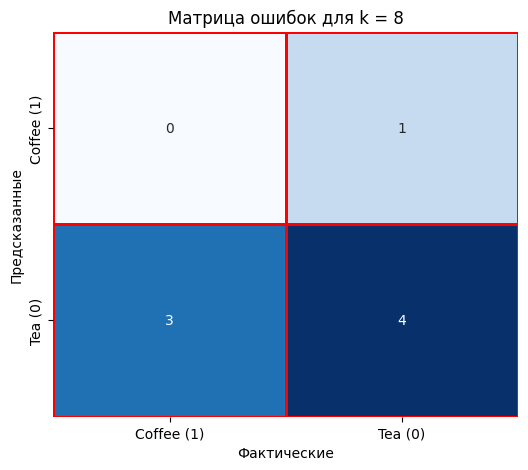

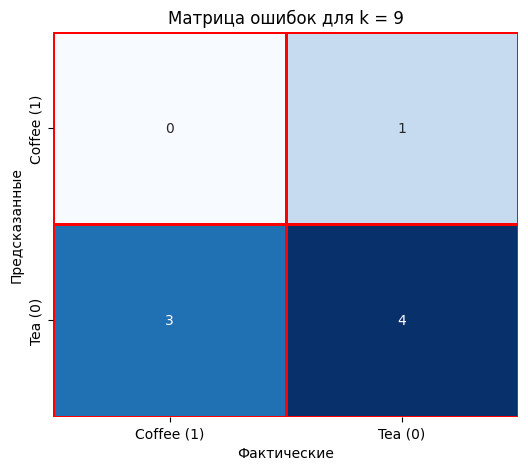

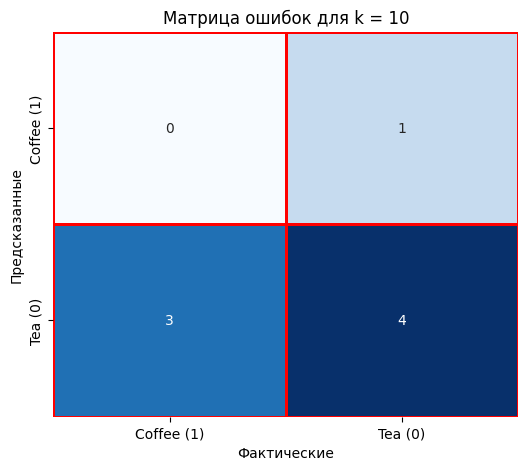


Результаты для k = 1:
              Precision    Recall  F1-score  Support
Coffee (1)     0.333333  0.333333  0.333333      3.0
Tea (0)        0.600000  0.600000  0.600000      5.0
accuracy       0.500000  0.500000  0.500000      8.0
macro avg      0.466667  0.466667  0.466667      8.0
weighted avg   0.500000  0.500000  0.500000      8.0

Результаты для k = 2:
              Precision    Recall  F1-score  Support
Coffee (1)     0.333333  0.333333  0.333333      3.0
Tea (0)        0.600000  0.600000  0.600000      5.0
accuracy       0.500000  0.500000  0.500000      8.0
macro avg      0.466667  0.466667  0.466667      8.0
weighted avg   0.500000  0.500000  0.500000      8.0

Результаты для k = 3:
              Precision    Recall  F1-score  Support
Coffee (1)     1.000000  0.666667  0.800000      3.0
Tea (0)        0.833333  1.000000  0.909091      5.0
accuracy       0.875000  0.875000  0.875000      8.0
macro avg      0.916667  0.833333  0.854545      8.0
weighted avg   0.895833  0.875

In [32]:
# Тестирование нескольких значений k
k_values = range(1, 11)  # Тестируем k от 1 до 10
results = []

for k in k_values:
    conf_matrix = confusion_matrix_knn(k)  # Матрица ошибок для текущего k
    metrics = calculate_metrics_with_names(conf_matrix)  # Метрики для текущего k
    accuracy = calculate_accuracy(conf_matrix)  # Точность для текущего k

    # Сохранение результатов
    detailed_summary_table = create_detailed_summary_table(metrics, accuracy)
    results.append((k, detailed_summary_table))

    # Визуализация матрицы ошибок для каждого k
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linecolor='red', linewidths=1)
    plt.title(f'Матрица ошибок для k = {k}')
    plt.xlabel('Фактические')
    plt.ylabel('Предсказанные')
    plt.xticks([0.5, 1.5], ['Coffee (1)', 'Tea (0)'])
    plt.yticks([0.5, 1.5], ['Coffee (1)', 'Tea (0)'])
    plt.show()

# Вывод результатов
for k, table in results:
    print(f"\nРезультаты для k = {k}:")
    print(table)


**Шаг 7: Заключение:**

k = 3 — является оптимальным значением для данной модели KNN. Оно обеспечивает наивысшую точность (87.5%) и сбалансированные метрики для обоих классов.

При k выше 3 модель начинает хуже справляться с предсказанием класса Coffee, а начиная с k = 5, этот класс вообще не распознается.

Таким образом, k = 3 — лучший выбор, так как модель сохраняет высокий уровень предсказания для обоих классов без значительных ошибок.